# Machine learning Case Study

In [80]:
#importing required modules
import numpy as np
import pandas as pd

#import modules for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#import YeoJohnson Feature Transformation
from scipy import stats

#import Label Encoder
from sklearn import preprocessing

#import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#import test-train split
from sklearn.model_selection import train_test_split

In [81]:
#setting maximum display rows and columsn to 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Import Data Set

In [82]:
df = pd.read_excel('Case Study.xlsx', sheet_name='Dataset', index_col='Ptid')

In [83]:
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Ptid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [84]:
df.shape

(3424, 68)

In [85]:
df.drop(['Ntm_Specialist_Flag','Ntm_Speciality_Bucket'], inplace=True, axis=1)

## Exploratory Data Analysis

### Missing value Treatment

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3424 entries, P1 to P3424
Data columns (total 66 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Persistency_Flag                                                    3424 non-null   object
 1   Gender                                                              3424 non-null   object
 2   Race                                                                3424 non-null   object
 3   Ethnicity                                                           3424 non-null   object
 4   Region                                                              3424 non-null   object
 5   Age_Bucket                                                          3424 non-null   object
 6   Ntm_Speciality                                                      3424 non-null   object
 7   Gluco_Record_Prior_Ntm     

In [87]:
# Missing value treamtment not required as no null values are present in data

### Outlier Treament

In [88]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [89]:
#Find outliers in data
def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [90]:
Dexa_Freq_During_Rx_outliers = find_outliers(df['Dexa_Freq_During_Rx'])
Dexa_Freq_During_Rx_outliers

Ptid
P33       20
P34       13
P63       12
P66       20
P90       10
P102      25
P111      11
P117      18
P165      10
P181      13
P187      21
P195      15
P199      28
P202      22
P218      15
P242      37
P247      13
P257      14
P265      15
P283      14
P293      10
P304      10
P328       8
P341      14
P350       8
P359      12
P369      14
P370      12
P374      11
P379      13
P383       8
P391       9
P416       9
P418      14
P427      13
P434      14
P449       8
P458      21
P463      22
P465      14
P481      18
P496      12
P497      17
P498      14
P506       8
P515      11
P518       8
P542      81
P546      11
P550      10
P564      14
P576      12
P589       8
P590      13
P593      13
P600       8
P604       8
P606      11
P614      11
P641       9
P647       8
P652      42
P654      12
P657      13
P658      10
P679       9
P685      17
P689      17
P701      12
P706      11
P711       8
P712      16
P727       9
P729       8
P730       8
P731       8
P760   

In [91]:
#percentage of outlier data
Dexa_Freq_During_Rx_outliers.count()/len(df['Dexa_Freq_During_Rx'])*100

13.434579439252337

In [12]:
#Since only 13% of data is outlier we can drop it
#df.drop(Dexa_Freq_During_Rx_outliers.index, inplace=True)

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

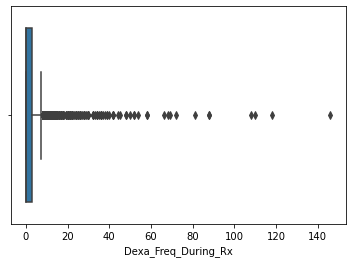

In [92]:
sns.boxplot(df['Dexa_Freq_During_Rx'])

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dexa_Freq_During_Rx', ylabel='Density'>

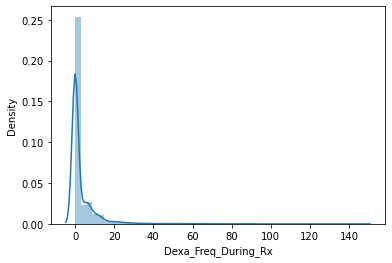

In [93]:
sns.distplot(df['Dexa_Freq_During_Rx'])

In [94]:
df['Dexa_Freq_During_Rx'].unique()

array([  0,   2,   7,   3,   5,  20,  13,   1,   6,  12,   4,  10,  25,
        11,  18,  21,  15,  28,  22,  37,  14,   8,   9,  17,  81,  42,
        16,  30,  19,  45,  27,  24,  58,  26,  23,  33, 110,  36,  34,
        88,  66,  32, 118,  48,  69,  38,  40,  68,  52,  50, 146,  44,
        35,  39, 108,  54,  72,  29], dtype=int64)

In [95]:
#Performing Yeo Johnson Transformation

In [96]:
df['Dexa_Freq_During_Rx_yj'], fit_lam = stats.yeojohnson(df['Dexa_Freq_During_Rx'])

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dexa_Freq_During_Rx_yj', ylabel='Density'>

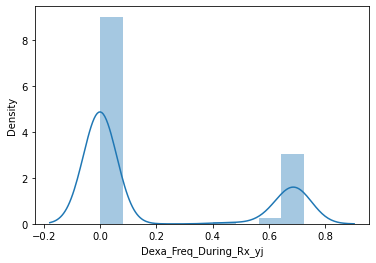

In [97]:
sns.distplot(df['Dexa_Freq_During_Rx_yj'])

In [98]:
df.drop('Dexa_Freq_During_Rx', inplace=True, axis=1)

## Visualization with Target Variable

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

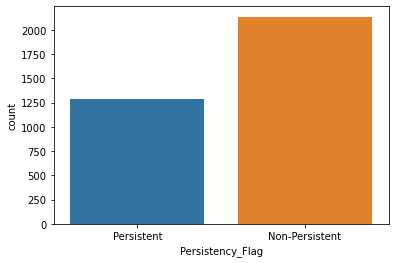

In [99]:
sns.countplot('Persistency_Flag', data=df)

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


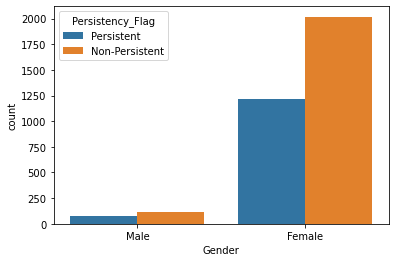

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


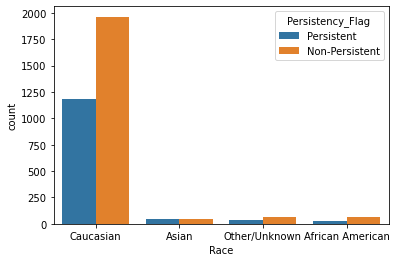

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


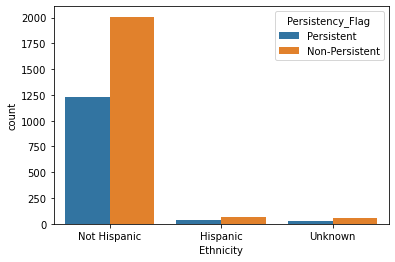

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


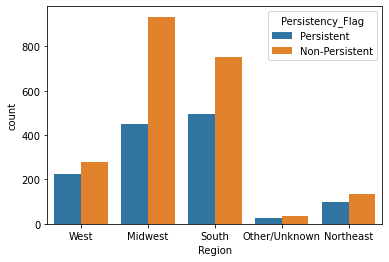

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


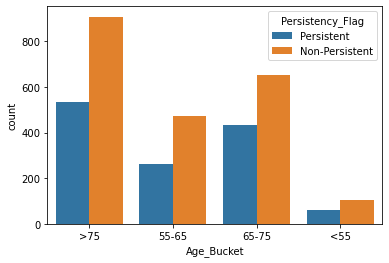

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


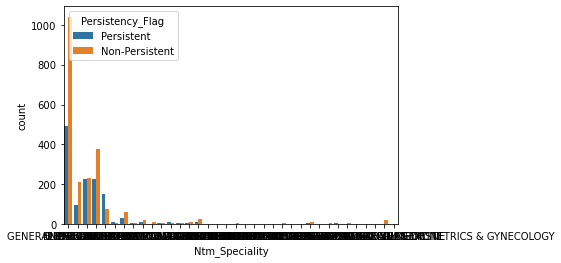

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


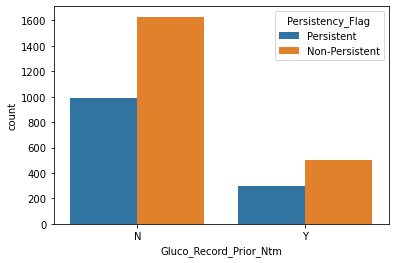

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


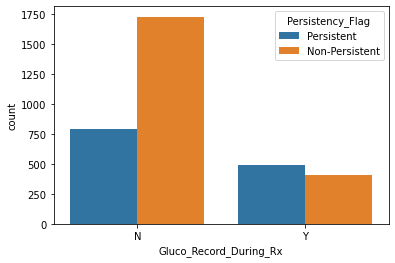

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


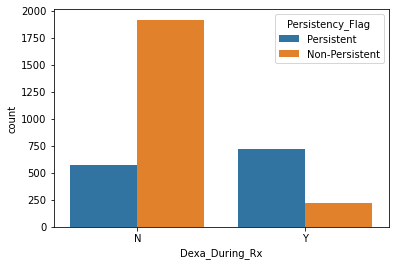

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


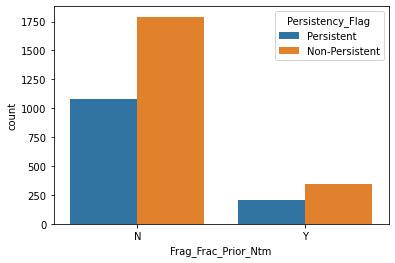

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


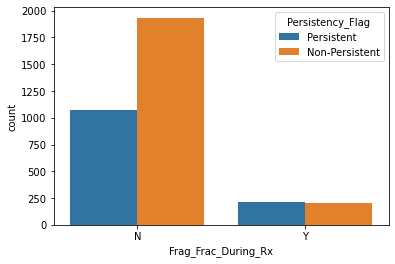

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


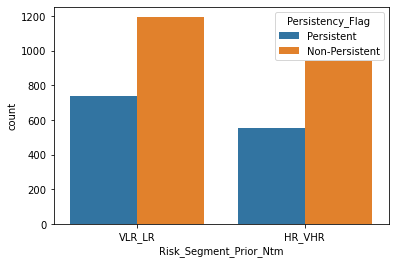

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


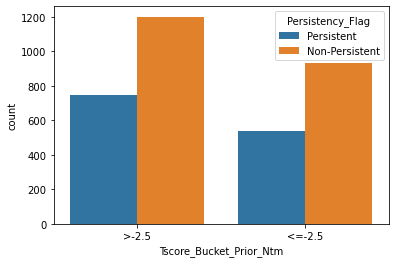

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


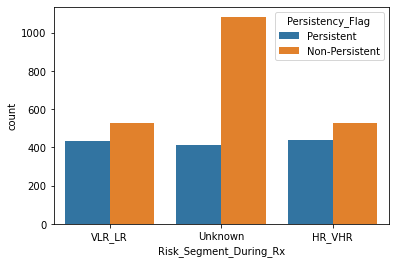

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


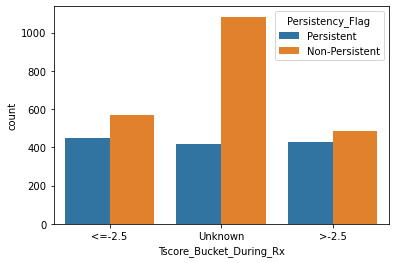

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


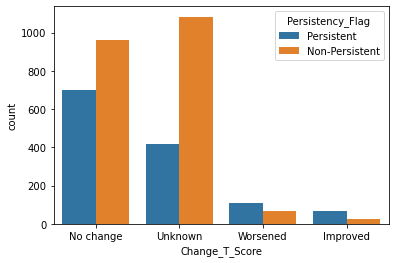

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


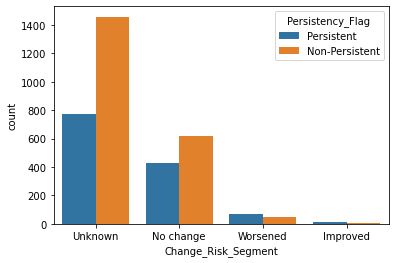

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


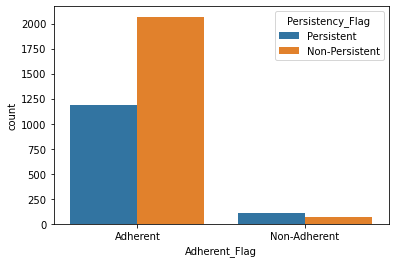

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


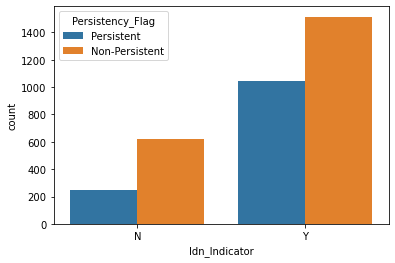

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


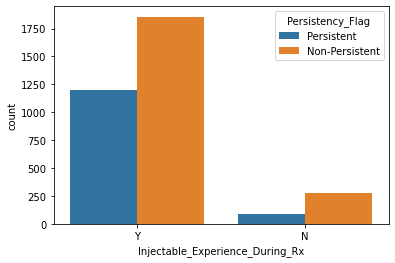

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


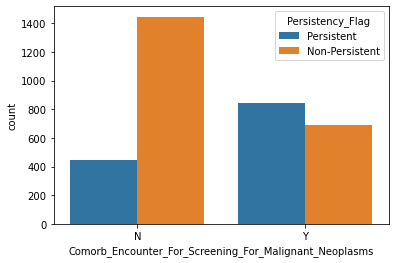

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


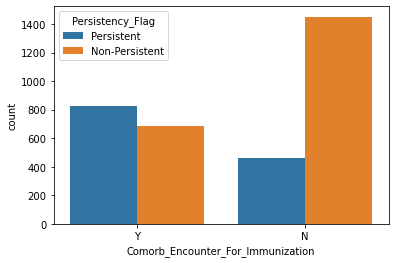

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


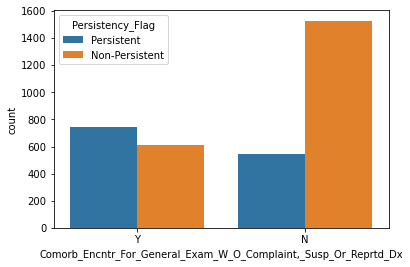

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


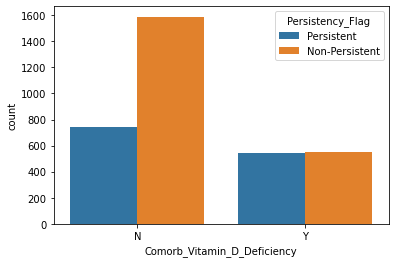

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


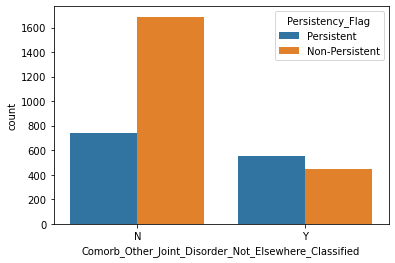

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


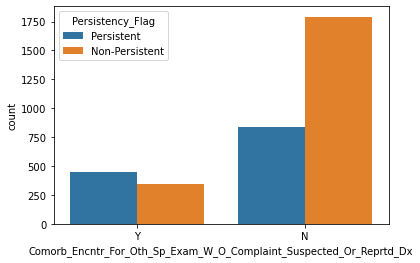

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


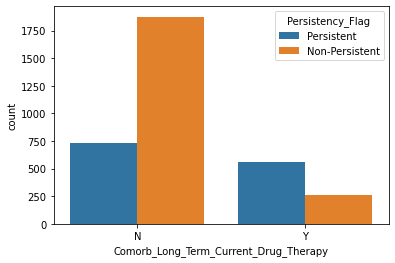

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


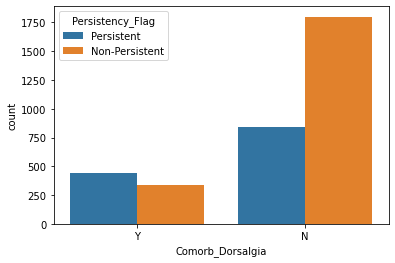

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


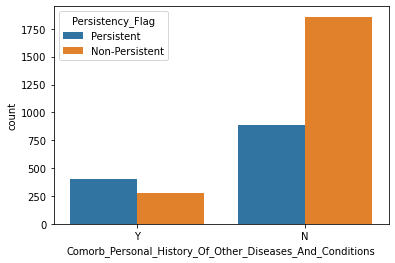

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


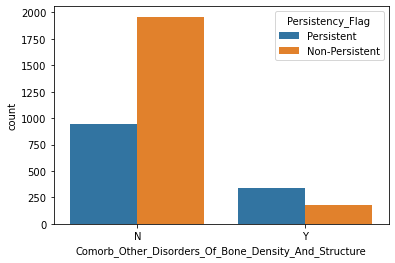

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


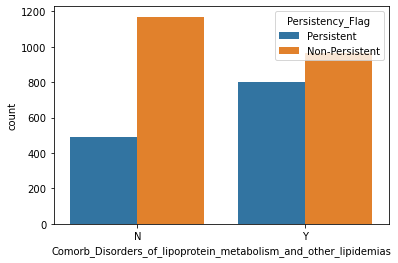

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


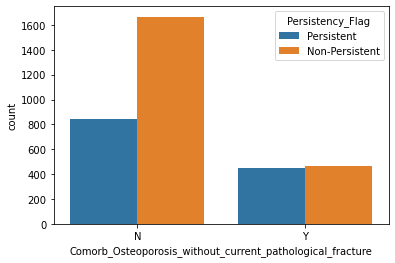

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


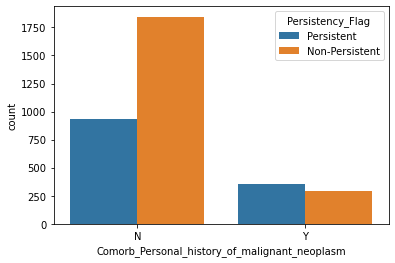

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


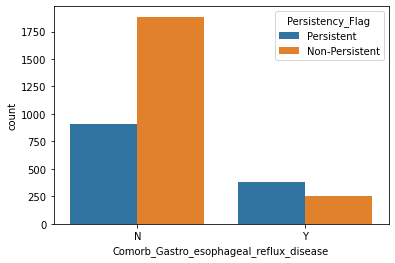

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


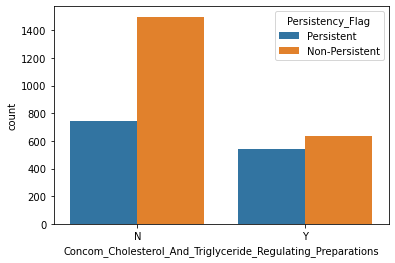

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


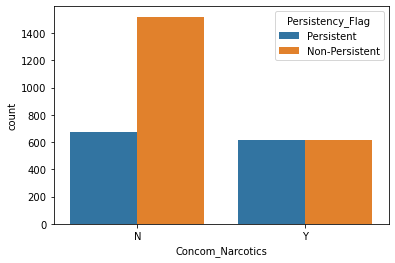

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


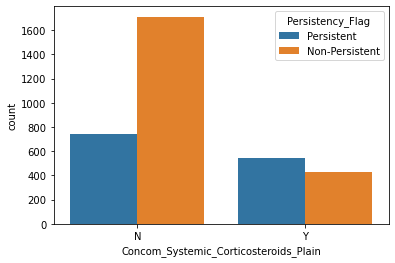

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


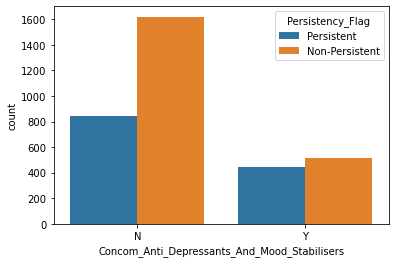

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


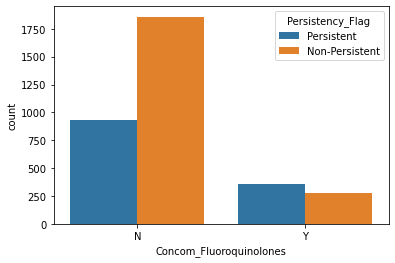

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


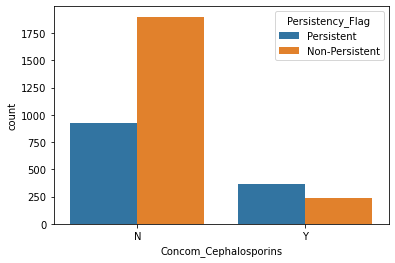

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


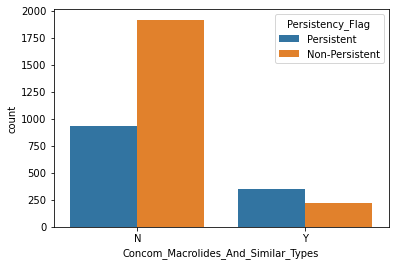

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


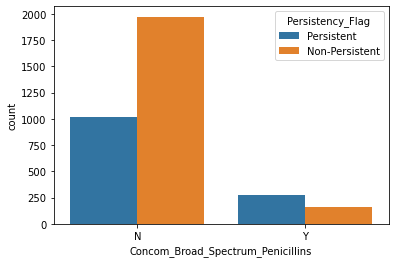

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


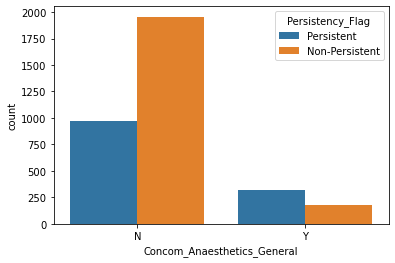

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


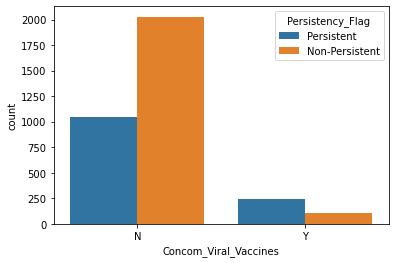

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


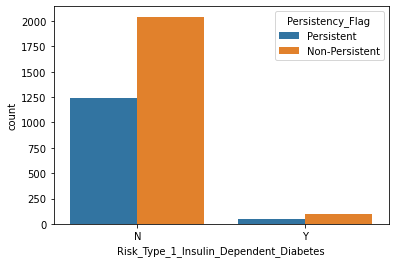

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


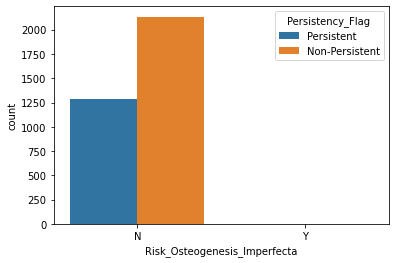

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


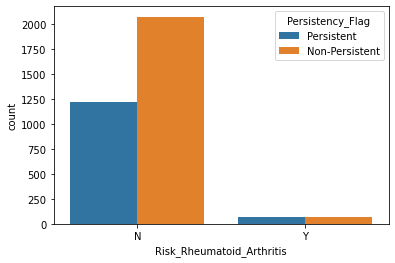

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


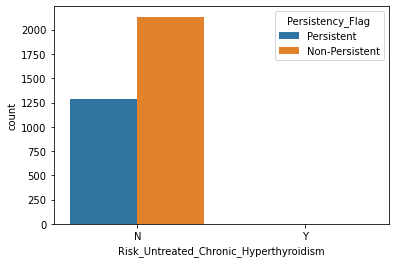

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


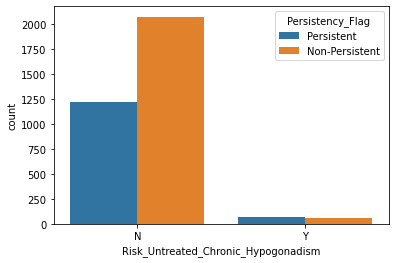

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


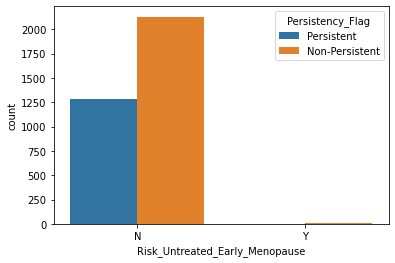

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


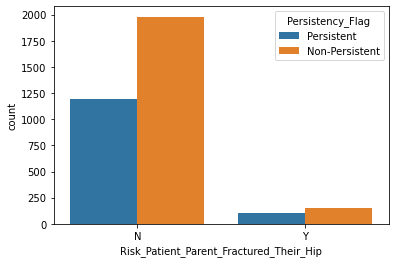

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


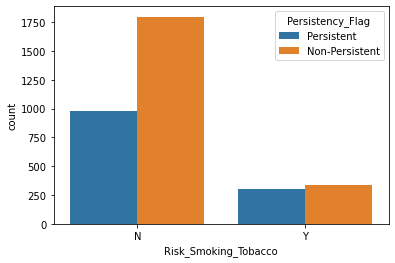

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


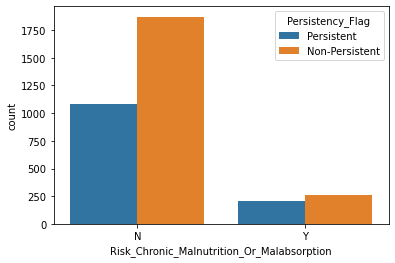

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


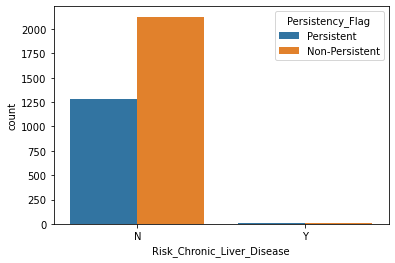

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


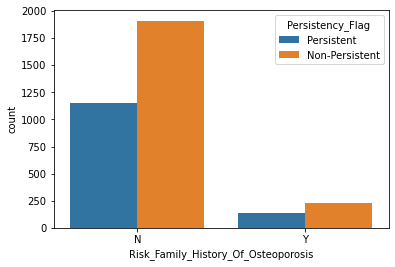

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


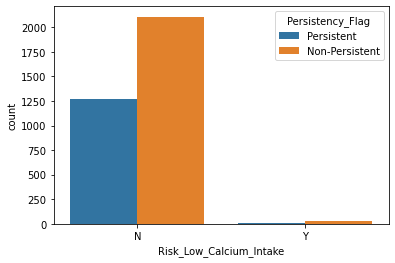

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


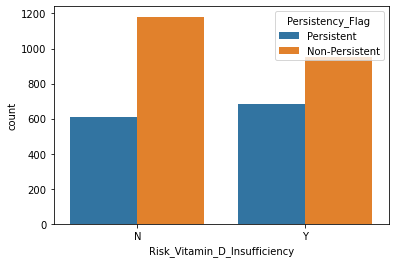

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


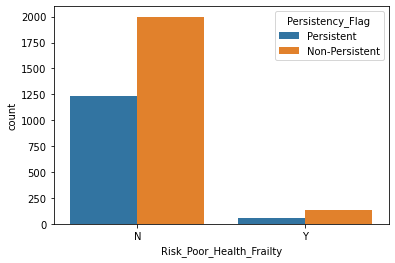

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


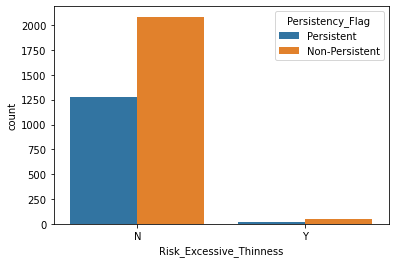

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


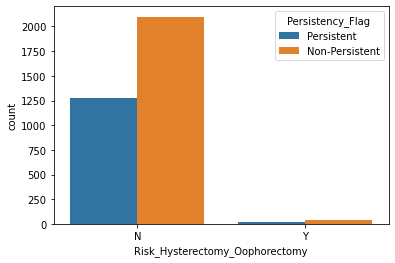

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


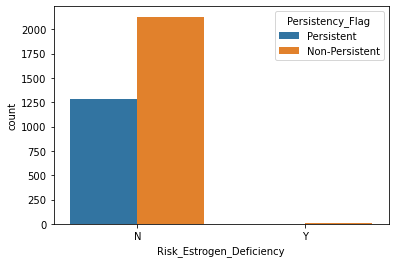

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


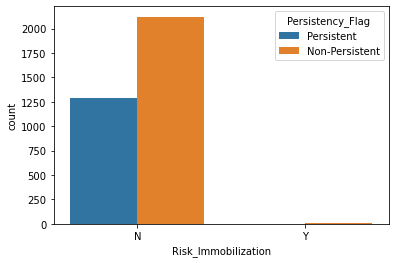

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


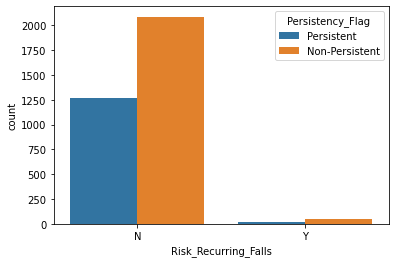

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


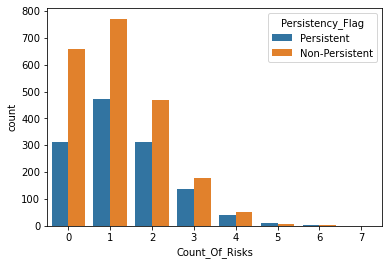

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


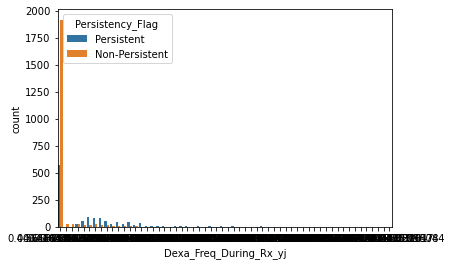

In [100]:
for i in df.columns:
    if i !='Persistency_Flag':
        sns.countplot(i,hue='Persistency_Flag',data=df)    
        plt.show()

## Label Encoding Target Variable

In [101]:
label_encoder = preprocessing.LabelEncoder()

In [102]:
df['Persistency_Flag']= label_encoder.fit_transform(df['Persistency_Flag'])

## Correlation with Target Variable

In [103]:
df.corr()

,Persistency_Flag,Count_Of_Risks,Dexa_Freq_During_Rx_yj
Persistency_Flag,1.00000,0.082210,0.505560
Count_Of_Risks,0.08221,1.000000,0.068509
Dexa_Freq_During_Rx_yj,0.50556,0.068509,1.000000


## One Hot Encoding on Categorical Data

In [104]:
cat_df = df.drop(['Persistency_Flag', 'Count_Of_Risks', 'Dexa_Freq_During_Rx_yj'], axis =1)

In [105]:
df_encoded = pd.get_dummies(cat_df, columns = cat_df.columns)

In [106]:
df_encoded.head()

,Gender_Female,Gender_Male,Race_African American,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Hispanic,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Midwest,Region_Northeast,Region_Other/Unknown,Region_South,Region_West,Age_Bucket_55-65,Age_Bucket_65-75,Age_Bucket_<55,Age_Bucket_>75,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_CLINICAL NURSE SPECIALIST,Ntm_Speciality_EMERGENCY MEDICINE,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GASTROENTEROLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_HOSPITAL MEDICINE,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_NEUROLOGY,Ntm_Speciality_NUCLEAR MEDICINE,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_OCCUPATIONAL MEDICINE,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OPHTHALMOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_ORTHOPEDICS,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PAIN MEDICINE,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_PLASTIC SURGERY,Ntm_Speciality_PODIATRY,Ntm_Speciality_PSYCHIATRY AND NEUROLOGY,Ntm_Speciality_PULMONARY MEDICINE,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_UROLOGY,Ntm_Speciality_Unknown,Ntm_Speciality_VASCULAR SURGERY,Gluco_Record_Prior_Ntm_N,Gluco_Record_Prior_Ntm_Y,Gluco_Record_During_Rx_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_N,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_Prior_Ntm_Y,Frag_Frac_During_Rx_N,Frag_Frac_During_Rx_Y,Risk_Segment_Prior_Ntm_HR_VHR,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_<=-2.5,Tscore_Bucket_Prior_Ntm_>-2.5,Risk_Segment_During_Rx_HR_VHR,Risk_Segment_During_Rx_Unknown,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_During_Rx_<=-2.5,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Unknown,Change_T_Score_Improved,Change_T_Score_No change,Change_T_Score_Unknown,Change_T_Score_Worsened,Change_Risk_Segment_Improved,Change_Risk_Segment_No change,Change_Risk_Segment_Unknown,Change_Risk_Segment_Worsened,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent,Idn_Indicator_N,Idn_Indicator_Y,Injectable_Experience_During_Rx_N,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_N,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_N,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N","Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y",Comorb_Vitamin_D_Deficiency_N,Comorb_Vitamin_D_Deficiency_Y,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_N,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_N,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_N,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_N,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_Y,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_N,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Personal_history_of_malignant_neoplasm_Y,Comorb_Gastro_esophageal_reflux_disease_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_N,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_N,Concom_Narcotics_Y,Concom_Systemic_Corticosteroids_Plain_N

In [107]:
num_df = df.drop(cat_df, axis=1)

In [108]:
df_enc_final = pd.concat([num_df,df_encoded], axis=1)

In [109]:
df_enc_final.head()

,Persistency_Flag,Count_Of_Risks,Dexa_Freq_During_Rx_yj,Gender_Female,Gender_Male,Race_African American,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Hispanic,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Midwest,Region_Northeast,Region_Other/Unknown,Region_South,Region_West,Age_Bucket_55-65,Age_Bucket_65-75,Age_Bucket_<55,Age_Bucket_>75,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_CLINICAL NURSE SPECIALIST,Ntm_Speciality_EMERGENCY MEDICINE,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GASTROENTEROLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_HOSPITAL MEDICINE,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_NEUROLOGY,Ntm_Speciality_NUCLEAR MEDICINE,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_OCCUPATIONAL MEDICINE,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OPHTHALMOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_ORTHOPEDICS,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PAIN MEDICINE,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_PLASTIC SURGERY,Ntm_Speciality_PODIATRY,Ntm_Speciality_PSYCHIATRY AND NEUROLOGY,Ntm_Speciality_PULMONARY MEDICINE,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_UROLOGY,Ntm_Speciality_Unknown,Ntm_Speciality_VASCULAR SURGERY,Gluco_Record_Prior_Ntm_N,Gluco_Record_Prior_Ntm_Y,Gluco_Record_During_Rx_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_N,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_Prior_Ntm_Y,Frag_Frac_During_Rx_N,Frag_Frac_During_Rx_Y,Risk_Segment_Prior_Ntm_HR_VHR,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_<=-2.5,Tscore_Bucket_Prior_Ntm_>-2.5,Risk_Segment_During_Rx_HR_VHR,Risk_Segment_During_Rx_Unknown,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_During_Rx_<=-2.5,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Unknown,Change_T_Score_Improved,Change_T_Score_No change,Change_T_Score_Unknown,Change_T_Score_Worsened,Change_Risk_Segment_Improved,Change_Risk_Segment_No change,Change_Risk_Segment_Unknown,Change_Risk_Segment_Worsened,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent,Idn_Indicator_N,Idn_Indicator_Y,Injectable_Experience_During_Rx_N,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_N,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_N,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N","Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y",Comorb_Vitamin_D_Deficiency_N,Comorb_Vitamin_D_Deficiency_Y,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_N,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_N,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_N,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_N,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_Y,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_N,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Personal_history_of_malignant_neoplasm_Y,Comorb_Gastro_esophageal_reflux_disease_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_N,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_N,Con

## Train Test Splitting

In [110]:
X = df_enc_final.drop('Persistency_Flag', axis=1)
y = pd.DataFrame(df_enc_final['Persistency_Flag'])

In [111]:
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (3424, 176)
Shape of y:  (3424, 1)


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = .30, stratify=y)

In [113]:
print("Shape of Train X: ",X_train.shape)
print("Shape of Train y: ",y_train.shape)
print("Shape of Test X: ",X_test.shape)
print("Shape of Test y: ",y_test.shape)

Shape of Train X:  (2396, 176)
Shape of Train y:  (2396, 1)
Shape of Test X:  (1028, 176)
Shape of Test y:  (1028, 1)


In [114]:
X_train.dtypes

Count_Of_Risks                                                                     int64
Dexa_Freq_During_Rx_yj                                                           float64
Gender_Female                                                                      uint8
Gender_Male                                                                        uint8
Race_African American                                                              uint8
Race_Asian                                                                         uint8
Race_Caucasian                                                                     uint8
Race_Other/Unknown                                                                 uint8
Ethnicity_Hispanic                                                                 uint8
Ethnicity_Not Hispanic                                                             uint8
Ethnicity_Unknown                                                                  uint8
Region_Midwest       

In [142]:
# cleaning column names in training dataset
clean_cols = dict()
for i in X_train:
    if any(char in [' ','<','>'] for char in i):
        clean_cols[i] = i.replace(' ','_').replace('>','greaterthan').replace('<','lessthan')
X_train.rename(columns=clean_cols, inplace=True)

In [147]:
# cleaning column names in testing dataset
clean_cols = dict()
for i in X_test:
    if any(char in [' ','<','>'] for char in i):
        clean_cols[i] = i.replace(' ','_').replace('>','greaterthan').replace('<','lessthan')
X_test.rename(columns=clean_cols, inplace=True)

In [120]:
train_dataset = pd.concat([X_train,y_train],axis=1)
test_dataset = pd.concat([X_test,y_test],axis=1)

In [121]:
print("Shape of Training dataset: ", train_dataset.shape)
print("Shape of Testing dataset: ", test_dataset.shape)

Shape of Training dataset:  (2396, 177)
Shape of Testing dataset:  (1028, 177)


## Feature Scaling

In [122]:
scaler = MinMaxScaler()

In [123]:
train_encoded_scale = pd.DataFrame(scaler.fit_transform(train_dataset), columns= train_dataset.columns)

In [124]:
train_encoded_scale.head()

,Count_Of_Risks,Dexa_Freq_During_Rx_yj,Gender_Female,Gender_Male,Race_African_American,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Hispanic,Ethnicity_Not_Hispanic,Ethnicity_Unknown,Region_Midwest,Region_Northeast,Region_Other/Unknown,Region_South,Region_West,Age_Bucket_55-65,Age_Bucket_65-75,Age_Bucket_lessthan55,Age_Bucket_greaterthan75,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_CLINICAL_NURSE_SPECIALIST,Ntm_Speciality_EMERGENCY_MEDICINE,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GASTROENTEROLOGY,Ntm_Speciality_GENERAL_PRACTITIONER,Ntm_Speciality_GERIATRIC_MEDICINE,Ntm_Speciality_HEMATOLOGY_&_ONCOLOGY,Ntm_Speciality_HOSPICE_AND_PALLIATIVE_MEDICINE,Ntm_Speciality_HOSPITAL_MEDICINE,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_NEUROLOGY,Ntm_Speciality_NUCLEAR_MEDICINE,Ntm_Speciality_OBSTETRICS_&_OBSTETRICS_&_GYNECOLOGY_&_OBSTETRICS_&_GYNECOLOGY,Ntm_Speciality_OBSTETRICS_AND_GYNECOLOGY,Ntm_Speciality_OCCUPATIONAL_MEDICINE,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OPHTHALMOLOGY,Ntm_Speciality_ORTHOPEDIC_SURGERY,Ntm_Speciality_ORTHOPEDICS,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PAIN_MEDICINE,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PHYSICAL_MEDICINE_AND_REHABILITATION,Ntm_Speciality_PLASTIC_SURGERY,Ntm_Speciality_PODIATRY,Ntm_Speciality_PSYCHIATRY_AND_NEUROLOGY,Ntm_Speciality_PULMONARY_MEDICINE,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY_AND_SURGICAL_SPECIALTIES,Ntm_Speciality_TRANSPLANT_SURGERY,Ntm_Speciality_UROLOGY,Ntm_Speciality_Unknown,Ntm_Speciality_VASCULAR_SURGERY,Gluco_Record_Prior_Ntm_N,Gluco_Record_Prior_Ntm_Y,Gluco_Record_During_Rx_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_N,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_Prior_Ntm_Y,Frag_Frac_During_Rx_N,Frag_Frac_During_Rx_Y,Risk_Segment_Prior_Ntm_HR_VHR,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_lessthan=-2.5,Tscore_Bucket_Prior_Ntm_greaterthan-2.5,Risk_Segment_During_Rx_HR_VHR,Risk_Segment_During_Rx_Unknown,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_During_Rx_lessthan=-2.5,Tscore_Bucket_During_Rx_greaterthan-2.5,Tscore_Bucket_During_Rx_Unknown,Change_T_Score_Improved,Change_T_Score_No_change,Change_T_Score_Unknown,Change_T_Score_Worsened,Change_Risk_Segment_Improved,Change_Risk_Segment_No_change,Change_Risk_Segment_Unknown,Change_Risk_Segment_Worsened,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent,Idn_Indicator_N,Idn_Indicator_Y,Injectable_Experience_During_Rx_N,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_N,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_N,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N","Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y",Comorb_Vitamin_D_Deficiency_N,Comorb_Vitamin_D_Deficiency_Y,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_N,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_N,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_N,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_N,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_Y,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_N,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Personal_history_of_malignant_neoplasm_Y,Comorb_Gastro_esophageal_reflux_disease_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_N,Concom_Cholesterol_And_Triglyceride_Regulating_Pre

In [125]:
test_encoded_scale = pd.DataFrame(scaler.fit_transform(test_dataset), columns= test_dataset.columns)

In [126]:
test_encoded_scale.head()

,Count_Of_Risks,Dexa_Freq_During_Rx_yj,Gender_Female,Gender_Male,Race_African American,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Hispanic,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Midwest,Region_Northeast,Region_Other/Unknown,Region_South,Region_West,Age_Bucket_55-65,Age_Bucket_65-75,Age_Bucket_<55,Age_Bucket_>75,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_CLINICAL NURSE SPECIALIST,Ntm_Speciality_EMERGENCY MEDICINE,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GASTROENTEROLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_HOSPITAL MEDICINE,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_NEUROLOGY,Ntm_Speciality_NUCLEAR MEDICINE,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_OCCUPATIONAL MEDICINE,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OPHTHALMOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_ORTHOPEDICS,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PAIN MEDICINE,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_PLASTIC SURGERY,Ntm_Speciality_PODIATRY,Ntm_Speciality_PSYCHIATRY AND NEUROLOGY,Ntm_Speciality_PULMONARY MEDICINE,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_UROLOGY,Ntm_Speciality_Unknown,Ntm_Speciality_VASCULAR SURGERY,Gluco_Record_Prior_Ntm_N,Gluco_Record_Prior_Ntm_Y,Gluco_Record_During_Rx_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_N,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_Prior_Ntm_Y,Frag_Frac_During_Rx_N,Frag_Frac_During_Rx_Y,Risk_Segment_Prior_Ntm_HR_VHR,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_<=-2.5,Tscore_Bucket_Prior_Ntm_>-2.5,Risk_Segment_During_Rx_HR_VHR,Risk_Segment_During_Rx_Unknown,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_During_Rx_<=-2.5,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Unknown,Change_T_Score_Improved,Change_T_Score_No change,Change_T_Score_Unknown,Change_T_Score_Worsened,Change_Risk_Segment_Improved,Change_Risk_Segment_No change,Change_Risk_Segment_Unknown,Change_Risk_Segment_Worsened,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent,Idn_Indicator_N,Idn_Indicator_Y,Injectable_Experience_During_Rx_N,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_N,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_N,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N","Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y",Comorb_Vitamin_D_Deficiency_N,Comorb_Vitamin_D_Deficiency_Y,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_N,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_N,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_N,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_N,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_Y,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_N,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Personal_history_of_malignant_neoplasm_Y,Comorb_Gastro_esophageal_reflux_disease_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_N,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_N,Concom_Narcotics_Y,C

## Feature Selection

In [65]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

In [66]:
#apply SelectKBest class to extract top 10 best features
#bestfeatures = SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(X_train,y_train)

In [67]:
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X_train.columns)

In [70]:
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  
#fet = featureScores.nlargest(10,'Score')

In [71]:
#fet

In [33]:
#sns.barplot(fet['Specs'],fet['Score'])

# Logistic Regression Model Building

In [148]:
#import Logistic Regression
from sklearn.linear_model import LogisticRegression

#import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

#import ROC Curve and and Area Under Curve
from sklearn.metrics import roc_curve, roc_auc_score

In [149]:
#Build a Logistic Regression model
log_reg_model = LogisticRegression()

In [150]:
#Fit model on training data
log_reg_model.fit(X_train,y_train)

C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [151]:
#Calculate Score on training Data
log_reg_model_score_train = log_reg_model.score(X_train,y_train)
log_reg_model_score_train

0.8376460767946577

In [152]:
#Calculate Score on Testing Data
log_reg_model_score_test = log_reg_model.score(X_test,y_test)
log_reg_model_score_test

0.8180933852140078

## Feature Importance

Feature: 0, Score: -0.33900
Feature: 1, Score: 2.54716
Feature: 2, Score: -0.08494
Feature: 3, Score: 0.10718
Feature: 4, Score: -0.58482
Feature: 5, Score: 0.75308
Feature: 6, Score: -0.12361
Feature: 7, Score: -0.02241
Feature: 8, Score: -0.28244
Feature: 9, Score: 0.10048
Feature: 10, Score: 0.20420
Feature: 11, Score: -0.32616
Feature: 12, Score: 0.32826
Feature: 13, Score: -0.50656
Feature: 14, Score: 0.41596
Feature: 15, Score: 0.11074
Feature: 16, Score: -0.18204
Feature: 17, Score: -0.10000
Feature: 18, Score: 0.12655
Feature: 19, Score: 0.17773
Feature: 20, Score: -1.39542
Feature: 21, Score: 0.00000
Feature: 22, Score: -0.03460
Feature: 23, Score: 0.38036
Feature: 24, Score: -0.40125
Feature: 25, Score: -0.16343
Feature: 26, Score: -0.08667
Feature: 27, Score: 0.10861
Feature: 28, Score: -0.01509
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.20405
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.18189
Feature: 33, Score: -0.01566
Feature: 34, Score: 0.38173
Feature: 35, 

<BarContainer object of 176 artists>

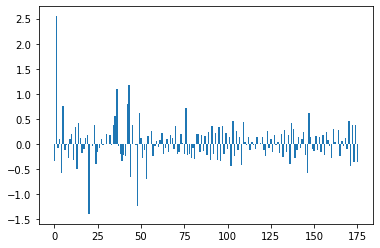

In [153]:
importance = log_reg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

## Confusion Matrix

In [154]:
y_test.value_counts()

Persistency_Flag
0                   641
1                   387
dtype: int64

In [155]:
print(confusion_matrix(y_test, log_reg_model.predict(X_test)))
#        Predicted
# Actual    0          1
# 0         TN         FP
# 1         FN         TP

[[577  64]
 [123 264]]


## Classification Report

In [156]:
print(classification_report(y_test, log_reg_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       641
           1       0.80      0.68      0.74       387

    accuracy                           0.82      1028
   macro avg       0.81      0.79      0.80      1028
weighted avg       0.82      0.82      0.81      1028



## ROC Curve and Area Under Curve

In [157]:
y_probs_test = log_reg_model.predict_proba(X_test)
y_probs_test 

array([[0.60283101, 0.39716899],
       [0.89203581, 0.10796419],
       [0.99407611, 0.00592389],
       ...,
       [0.86314369, 0.13685631],
       [0.9218031 , 0.0781969 ],
       [0.31533714, 0.68466286]])

Text(0, 0.5, 'True Positive Rate')

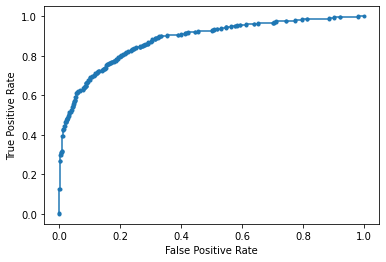

In [158]:
# predict probabilities
yhat = log_reg_model.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)

# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [159]:
#Calculating ROC Area Under Curve
yhat = log_reg_model.predict_proba(X_test)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print('Logistic Regression ROC Area Under Curve %.3f' % roc_auc)

Logistic Regression ROC Area Under Curve 0.881


# Logistic Regresion with L1 Regularization

In [160]:
#Build a Logistic Regression model with L1 Regularization
log_reg_model_l1 = LogisticRegression(penalty = 'l1',solver='saga')

In [161]:
#Fit model on Training Data
log_reg_model_l1.fit(X_train,y_train)

C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [162]:
#check model accuracy on training data
log_reg_model_l1.score(X_train,y_train)

0.8313856427378965

In [163]:
#check model accuracy on testing data
log_reg_model_l1.score(X_test,y_test)

0.816147859922179

## Feature Importance

Feature: 0, Score: -0.33208
Feature: 1, Score: 3.28214
Feature: 2, Score: -0.05793
Feature: 3, Score: 0.08016
Feature: 4, Score: -0.39417
Feature: 5, Score: 0.82025
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.25367
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.43811
Feature: 12, Score: 0.18530
Feature: 13, Score: -0.55563
Feature: 14, Score: 0.27295
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.12778
Feature: 17, Score: -0.05704
Feature: 18, Score: 0.05944
Feature: 19, Score: 0.17714
Feature: 20, Score: -1.51999
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.29401
Feature: 24, Score: 0.00000
Feature: 25, Score: -0.23448
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.22335
Feature: 35, Score:

<BarContainer object of 176 artists>

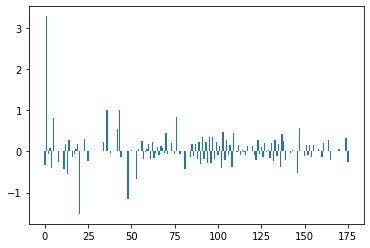

In [164]:
importance = log_reg_model_l1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

## Confusion Matrix

In [165]:
print(confusion_matrix(y_test, log_reg_model_l1.predict(X_test)))

[[575  66]
 [123 264]]


## Classification Report

In [166]:
print(classification_report(y_test, log_reg_model_l1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       641
           1       0.80      0.68      0.74       387

    accuracy                           0.82      1028
   macro avg       0.81      0.79      0.80      1028
weighted avg       0.81      0.82      0.81      1028



## ROC Curve and Area Under the Curve

Text(0, 0.5, 'True Positive Rate')

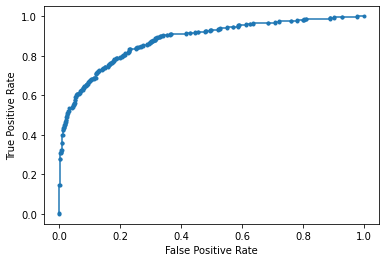

In [167]:
# predict probabilities
yhat = log_reg_model_l1.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)

# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic L1')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [168]:
#Calculating ROC Area Under Curve
yhat = log_reg_model_l1.predict_proba(X_test)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print('Logistic Regression ROC Area Under Curve %.3f' % roc_auc)

Logistic Regression ROC Area Under Curve 0.881


# Logistic Regresion with L2 Regularization

In [169]:
#Build a Logistic Regression model with L1 Regularization
log_reg_model_l2 = LogisticRegression(penalty = 'l2')

In [170]:
#fit model on training data
log_reg_model_l2.fit(X_train,y_train)

C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
#Accuracy score on training data
log_reg_model_l2.score(X_train,y_train)

0.8376460767946577

In [172]:
#Accuracy score on testing data
log_reg_model_l2.score(X_test,y_test)

0.8180933852140078

## Feature Importance

Feature: 0, Score: -0.33900
Feature: 1, Score: 2.54716
Feature: 2, Score: -0.08494
Feature: 3, Score: 0.10718
Feature: 4, Score: -0.58482
Feature: 5, Score: 0.75308
Feature: 6, Score: -0.12361
Feature: 7, Score: -0.02241
Feature: 8, Score: -0.28244
Feature: 9, Score: 0.10048
Feature: 10, Score: 0.20420
Feature: 11, Score: -0.32616
Feature: 12, Score: 0.32826
Feature: 13, Score: -0.50656
Feature: 14, Score: 0.41596
Feature: 15, Score: 0.11074
Feature: 16, Score: -0.18204
Feature: 17, Score: -0.10000
Feature: 18, Score: 0.12655
Feature: 19, Score: 0.17773
Feature: 20, Score: -1.39542
Feature: 21, Score: 0.00000
Feature: 22, Score: -0.03460
Feature: 23, Score: 0.38036
Feature: 24, Score: -0.40125
Feature: 25, Score: -0.16343
Feature: 26, Score: -0.08667
Feature: 27, Score: 0.10861
Feature: 28, Score: -0.01509
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.20405
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.18189
Feature: 33, Score: -0.01566
Feature: 34, Score: 0.38173
Feature: 35, 

<BarContainer object of 176 artists>

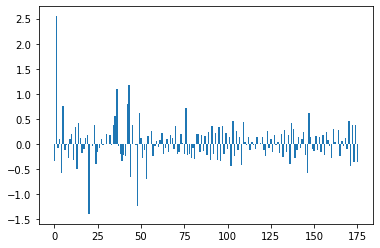

In [173]:
importance = log_reg_model_l2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

## Confusion Matrix

In [174]:
print(confusion_matrix(y_test, log_reg_model_l2.predict(X_test)))

[[577  64]
 [123 264]]


## Classification Report

In [175]:
print(classification_report(y_test, log_reg_model_l2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       641
           1       0.80      0.68      0.74       387

    accuracy                           0.82      1028
   macro avg       0.81      0.79      0.80      1028
weighted avg       0.82      0.82      0.81      1028



## ROC Curve and Area Under the Curve

Text(0, 0.5, 'True Positive Rate')

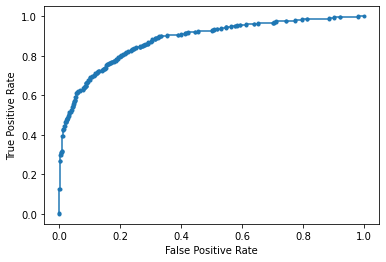

In [176]:
# predict probabilities
yhat = log_reg_model_l2.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)

# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic L2')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [177]:
#Calculating ROC Area Under Curve
yhat = log_reg_model_l2.predict_proba(X_test)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print('Logistic Regression ROC Area Under Curve %.3f' % roc_auc)

Logistic Regression ROC Area Under Curve 0.881


# Decision Tree

In [178]:
#import tree
from sklearn.tree import DecisionTreeClassifier

In [179]:
dec_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=0)  

In [180]:
dec_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [181]:
y_pred = dec_tree_model.predict(X_test)

In [182]:
#accuracy of training data
dec_tree_model.score(X_train,y_train)

1.0

In [183]:
#accuracy of testing data
dec_tree_model.score(X_test,y_test)

0.7354085603112841

## Feature Importance

Feature: 0, Score: 0.02800
Feature: 1, Score: 0.22408
Feature: 2, Score: 0.00509
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00087
Feature: 5, Score: 0.00170
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00564
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00243
Feature: 11, Score: 0.00989
Feature: 12, Score: 0.00462
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01383
Feature: 15, Score: 0.01130
Feature: 16, Score: 0.01167
Feature: 17, Score: 0.01882
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01626
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01054
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01292
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00338
Feature: 28, Score: 0.00133
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00373
Feature: 35, Score: 0.00000
Fe

<BarContainer object of 176 artists>

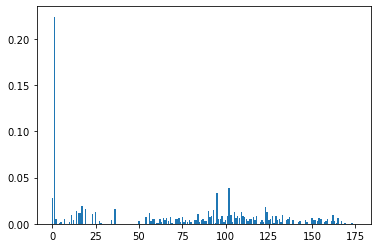

In [184]:
importance = dec_tree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

## Confusion Matrix

In [185]:
print(confusion_matrix(y_test, dec_tree_model.predict(X_test)))

[[510 131]
 [141 246]]


## Classification Report 

In [186]:
print(classification_report(y_test, dec_tree_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       641
           1       0.65      0.64      0.64       387

    accuracy                           0.74      1028
   macro avg       0.72      0.72      0.72      1028
weighted avg       0.73      0.74      0.73      1028



## ROC Curve and Area Under the Curve

Text(0, 0.5, 'True Positive Rate')

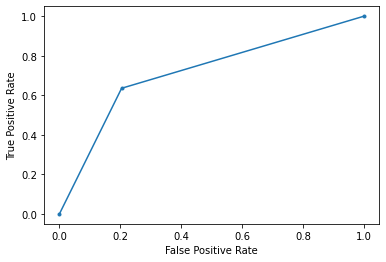

In [187]:
# predict probabilities
yhat = dec_tree_model.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)

# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [188]:
#Calculating ROC Area Under Curve
yhat = dec_tree_model.predict_proba(X_test)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print('Decision Tree ROC Area Under Curve %.3f' % roc_auc)

Decision Tree ROC Area Under Curve 0.716


# Random Forest Algorithm

In [189]:
#import algorithm
from sklearn.ensemble import RandomForestClassifier

In [190]:
#build the model
ran_for_model = RandomForestClassifier(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 10)

In [194]:
#fit the model
ran_for_model.fit(X_train ,y_train)

C:\Users\aurlu\AppData\Local\Temp\ipykernel_25044\1128352899.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_for_model.fit(X_train ,y_train)


RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=300,
                       random_state=10)

In [195]:
#accuracy on training data
ran_for_model.score(X_train,y_train)

0.8234557595993323

In [196]:
#accuracy on testing data
ran_for_model.score(X_test,y_test)

0.8035019455252919

## Feature Importance

Feature: 0, Score: 0.00222
Feature: 1, Score: 0.15756
Feature: 2, Score: 0.00050
Feature: 3, Score: 0.00112
Feature: 4, Score: 0.00036
Feature: 5, Score: 0.00022
Feature: 6, Score: 0.00038
Feature: 7, Score: 0.00052
Feature: 8, Score: 0.00049
Feature: 9, Score: 0.00044
Feature: 10, Score: 0.00019
Feature: 11, Score: 0.00376
Feature: 12, Score: 0.00079
Feature: 13, Score: 0.00086
Feature: 14, Score: 0.00151
Feature: 15, Score: 0.00093
Feature: 16, Score: 0.00086
Feature: 17, Score: 0.00086
Feature: 18, Score: 0.00038
Feature: 19, Score: 0.00063
Feature: 20, Score: 0.00057
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00204
Feature: 24, Score: 0.00003
Feature: 25, Score: 0.00239
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00014
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00015
Feature: 35, Score: 0.00000
Fe

<BarContainer object of 176 artists>

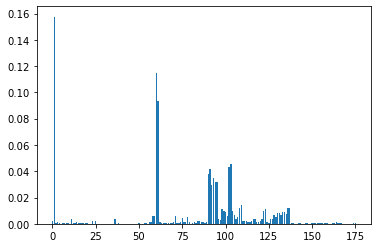

In [197]:
# get importance
importance = ran_for_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

## Confusion Matrix

In [198]:
print(confusion_matrix(y_test, ran_for_model.predict(X_test)))

[[586  55]
 [147 240]]


## Classification Report

In [199]:
print(classification_report(y_test, ran_for_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       641
           1       0.81      0.62      0.70       387

    accuracy                           0.80      1028
   macro avg       0.81      0.77      0.78      1028
weighted avg       0.80      0.80      0.80      1028



## ROC Curve and Area Under the Curve

Text(0, 0.5, 'True Positive Rate')

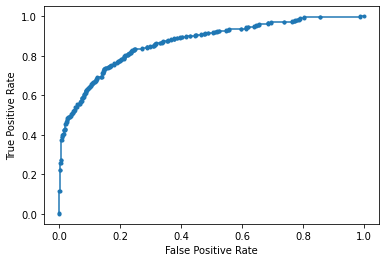

In [200]:
# predict probabilities
yhat = ran_for_model.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)

# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Random Forest Method')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [201]:
#Calculating ROC Area Under Curve
yhat = ran_for_model.predict_proba(X_test)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print('ROC Area Under Curve %.3f' % roc_auc)

ROC Area Under Curve 0.869


# Gradient Boosting Model (GBM)

In [202]:
#import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [203]:
#build the model
gbm_model = GradientBoostingClassifier()

In [204]:
#fit model on training data
gbm_model.fit(X_train,y_train)

C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [205]:
#accuracy of model on training data
gbm_model.score(X_train,y_train)

0.8702003338898163

In [206]:
#accuracy of model on testing data
gbm_model.score(X_test,y_test)

0.8151750972762646

## Feature Importance

Feature: 0, Score: 0.00157
Feature: 1, Score: 0.46269
Feature: 2, Score: 0.00098
Feature: 3, Score: 0.00034
Feature: 4, Score: 0.00019
Feature: 5, Score: 0.00355
Feature: 6, Score: 0.00024
Feature: 7, Score: 0.00063
Feature: 8, Score: 0.00021
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.01436
Feature: 12, Score: 0.00160
Feature: 13, Score: 0.00860
Feature: 14, Score: 0.00691
Feature: 15, Score: 0.00407
Feature: 16, Score: 0.00209
Feature: 17, Score: 0.00105
Feature: 18, Score: 0.00218
Feature: 19, Score: 0.00268
Feature: 20, Score: 0.00366
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00581
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01131
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00065
Feature: 35, Score: 0.00026
Fe

<BarContainer object of 176 artists>

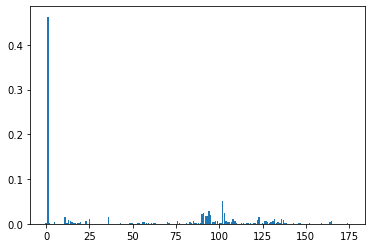

In [207]:
importance = gbm_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

## Confusion Matrix

In [208]:
print(confusion_matrix(y_test, gbm_model.predict(X_test)))

[[567  74]
 [116 271]]


## Classification Report

In [209]:
print(classification_report(y_test, gbm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       641
           1       0.79      0.70      0.74       387

    accuracy                           0.82      1028
   macro avg       0.81      0.79      0.80      1028
weighted avg       0.81      0.82      0.81      1028



## ROC Curve and Area Under the Curve

Text(0, 0.5, 'True Positive Rate')

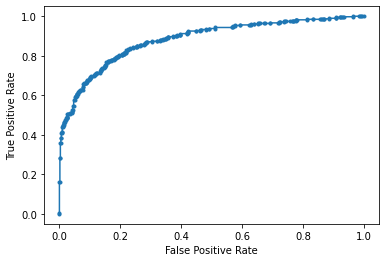

In [210]:
# predict probabilities
yhat = gbm_model.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)

# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting Method')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [211]:
#Calculating ROC Area Under Curve
yhat = gbm_model.predict_proba(X_test,)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print('ROC Area Under Curve %.3f' % roc_auc)

ROC Area Under Curve 0.882


# XG Boost

In [212]:
#import XGBoost
from xgboost import XGBClassifier

In [213]:
#build the model
xgboost_model = XGBClassifier()

In [214]:
#fit model on training data
xgboost_model.fit(X_train,y_train)

C:\Users\aurlu\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\

[15:22:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [216]:
#check model accuracy on training data
xgboost_model.score(X_train,y_train)

0.9895659432387313

In [217]:
#check model accuracy on testing data
xgboost_model.score(X_test,y_test)

0.8122568093385214

## Feature Importance

Feature: 0, Score: 0.00751
Feature: 1, Score: 0.07563
Feature: 2, Score: 0.00877
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00342
Feature: 5, Score: 0.00754
Feature: 6, Score: 0.01230
Feature: 7, Score: 0.01498
Feature: 8, Score: 0.00475
Feature: 9, Score: 0.00676
Feature: 10, Score: 0.00663
Feature: 11, Score: 0.01163
Feature: 12, Score: 0.00910
Feature: 13, Score: 0.00993
Feature: 14, Score: 0.00989
Feature: 15, Score: 0.01336
Feature: 16, Score: 0.00919
Feature: 17, Score: 0.00932
Feature: 18, Score: 0.01037
Feature: 19, Score: 0.00743
Feature: 20, Score: 0.01300
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01162
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01089
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00411
Feature: 35, Score: 0.00000
Fe

<BarContainer object of 176 artists>

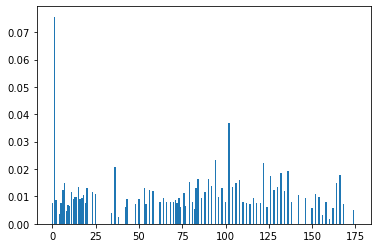

In [218]:
importance = xgboost_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

## Confusion Matrix

In [219]:
print(confusion_matrix(y_test, xgboost_model.predict(X_test)))

[[559  82]
 [111 276]]


## Classification Report

In [220]:
print(classification_report(y_test, xgboost_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       641
           1       0.77      0.71      0.74       387

    accuracy                           0.81      1028
   macro avg       0.80      0.79      0.80      1028
weighted avg       0.81      0.81      0.81      1028



## ROC Curve and Area Under the Curve

Text(0, 0.5, 'True Positive Rate')

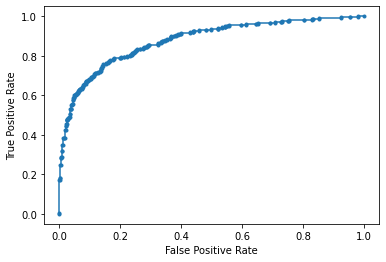

In [221]:
# predict probabilities
yhat = xgboost_model.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)

# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting Method')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [222]:
#Calculating ROC Area Under Curve
yhat = xgboost_model.predict_proba(X_test,)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print('ROC Area Under Curve %.3f' % roc_auc)

ROC Area Under Curve 0.878


# Cross Validation

In [223]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [224]:
#splitting training data in 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1916, Test set:480
Fold:2, Train set: 1917, Test set:479
Fold:3, Train set: 1917, Test set:479
Fold:4, Train set: 1917, Test set:479
Fold:5, Train set: 1917, Test set:479


## Using Logistic Regression

In [225]:
log_reg_score = cross_val_score(linear_model.LogisticRegression(random_state= 42), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {log_reg_score}')
print(f'Average score: {"{:.2f}".format(log_reg_score.mean())}')
print(f'Std Deviation score: {"{:.2f}".format(log_reg_score.std())}')

C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Scores for each fold are: [0.81875    0.80167015 0.80375783 0.81837161 0.82881002]
Average score: 0.81
Std Deviation score: 0.01


C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## Using Decision Classifier

In [226]:
dec_tree_score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {dec_tree_score}')
print(f'Average score: {"{:.2f}".format(dec_tree_score.mean())}')
print(f'Std Deviation score: {"{:.2f}".format(dec_tree_score.std())}')

Scores for each fold are: [0.75416667 0.69728601 0.69311065 0.72860125 0.77244259]
Average score: 0.73
Std Deviation score: 0.03


## Using Random Forest Classifier

In [227]:
ran_for_score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {ran_for_score}')
print(f'Average score: {"{:.2f}".format(ran_for_score.mean())}')
print(f'Std Deviation score: {"{:.2f}".format(ran_for_score.std())}')

C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Scores for each fold are: [0.82083333 0.79331942 0.80167015 0.80375783 0.82045929]
Average score: 0.81
Std Deviation score: 0.01


# Grid Search

In [1]:
#import required modules
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))